In [1]:
# Suppressing Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 85)
pd.set_option('display.max_rows', 100)

## Step 1: Reading CSV File & Doing Basic Checks

In [3]:
lead_data = pd.read_csv("file:///Users/anshulchaudhary/Downloads/Lead%20Scoring%20Assignment/Leads.csv")
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# There are columns with entry as 'Select' and those are that columns in which the user did not fill the column/s.
# Checking the total no. entries as 'Select' in each particular column.
lead_data.isin(['Select']).sum(axis=0)

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Country                                             0
Specialization                                   1942
How did you hear about X Education               5043
What is your current occupation                     0
What matters most to you in choosing a course       0
Search                                              0
Magazine                                            0
Newspaper Article           

In [5]:
# Replacing all entries as 'Select' to 'Nan' or null values (missing values).
lead_data = lead_data.replace('Select',np.nan)

In [6]:
# Looking at general informantion for each column.
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   5860 

In [7]:
# Calculating percentages of missing values in each column.
round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

## Step 2: Cleaning of Data

In [8]:
# We have total of 9240 rows (very less data) and dropping more than 35% of data does not make sense.
# Hence, we have to drop all the columns those have missing data of more than 35%.
lead_data = lead_data.drop(['Specialization','How did you hear about X Education','Tags','Lead Quality','Lead Profile','City','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'], axis=1)
round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

### Checking the skewness in all the columns having high percentages of missing values: 1. Country; 2. What is your current occupation; 3. What matters most to you in choosing a course.

In [9]:
round(100*(lead_data['Country'].value_counts()/len(lead_data.index)), 2)

India                   70.26
United States            0.75
United Arab Emirates     0.57
Singapore                0.26
Saudi Arabia             0.23
United Kingdom           0.16
Australia                0.14
Qatar                    0.11
Bahrain                  0.08
Hong Kong                0.08
Oman                     0.06
France                   0.06
unknown                  0.05
Canada                   0.04
Kuwait                   0.04
Nigeria                  0.04
Germany                  0.04
South Africa             0.04
Sweden                   0.03
Uganda                   0.02
China                    0.02
Asia/Pacific Region      0.02
Ghana                    0.02
Philippines              0.02
Belgium                  0.02
Italy                    0.02
Bangladesh               0.02
Netherlands              0.02
Russia                   0.01
Indonesia                0.01
Malaysia                 0.01
Tanzania                 0.01
Denmark                  0.01
Switzerlan

In [10]:
round(100*(lead_data['What matters most to you in choosing a course'].value_counts()/len(lead_data.index)), 2)

Better Career Prospects      70.65
Flexibility & Convenience     0.02
Other                         0.01
Name: What matters most to you in choosing a course, dtype: float64

In [11]:
round(100*(lead_data['What is your current occupation'].value_counts()/len(lead_data.index)), 2)

Unemployed              60.61
Working Professional     7.64
Student                  2.27
Other                    0.17
Housewife                0.11
Businessman              0.09
Name: What is your current occupation, dtype: float64

### Imputing missing values for rest of the columns which have very less missing values

In [12]:
# Removing above mentioned 3 columns which are highly skewed to one particular value.
lead_data = lead_data.drop(['Country','What matters most to you in choosing a course','What is your current occupation'], axis=1)
round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)

Prospect ID                                 0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Update me on Supply Chain Content           0.00
Get updates on DM Co

In [13]:
lead_data.shape

(9240, 24)

In [14]:
round(100*(lead_data['Lead Source'].value_counts()/len(lead_data.index)), 2)

Google               31.04
Direct Traffic       27.52
Olark Chat           18.99
Organic Search       12.49
Reference             5.78
Welingak Website      1.54
Referral Sites        1.35
Facebook              0.60
bing                  0.06
google                0.05
Click2call            0.04
Social Media          0.02
Live Chat             0.02
Press_Release         0.02
NC_EDM                0.01
Pay per Click Ads     0.01
welearnblog_Home      0.01
testone               0.01
WeLearn               0.01
blog                  0.01
youtubechannel        0.01
Name: Lead Source, dtype: float64

In [15]:
# Imputing missing values with 'Google' (Mode).
lead_data['Lead Source'] = lead_data['Lead Source'].fillna('Google')
round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)

Prospect ID                                 0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.00
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Update me on Supply Chain Content           0.00
Get updates on DM Co

In [16]:
# Replcaing all the categories those are less in no. to one particular category 'Others'.
lead_data['Lead Source'] = lead_data['Lead Source'].replace(['Welingak Website','Referral Sites','Facebook','Click2call','bing','Live Chat','Social Media','testone','WeLearn','Pay per Click Ads','Press_Release','google','youtubechannel','blog','welearnblog_Home','NC_EDM'],'Others')
round(100*(lead_data['Lead Source'].value_counts()/len(lead_data.index)), 2)

Google            31.43
Direct Traffic    27.52
Olark Chat        18.99
Organic Search    12.49
Reference          5.78
Others             3.79
Name: Lead Source, dtype: float64

In [17]:
# This is continuous variable having integer values.
lead_data['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [18]:
# Replacing missing values with the integer value just less than the mean that is 3.
lead_data['TotalVisits'] = lead_data['TotalVisits'].fillna('3')
round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)

Prospect ID                                 0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.00
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 0.00
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Update me on Supply Chain Content           0.00
Get updates on DM Co

In [19]:
# This is continuous variable having integer values.
lead_data['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [20]:
# Replacing missing values with the integer value just less than the mean that is 2.
lead_data['Page Views Per Visit'] = lead_data['Page Views Per Visit'].fillna('2')
round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)

Prospect ID                                 0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.00
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 0.00
Total Time Spent on Website                 0.00
Page Views Per Visit                        0.00
Last Activity                               1.11
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Update me on Supply Chain Content           0.00
Get updates on DM Co

In [21]:
round(100*(lead_data['Last Activity'].value_counts()/len(lead_data.index)), 2)

Email Opened                    37.20
SMS Sent                        29.71
Olark Chat Conversation         10.53
Page Visited on Website          6.93
Converted to Lead                4.63
Email Bounced                    3.53
Email Link Clicked               2.89
Form Submitted on Website        1.26
Unreachable                      1.01
Unsubscribed                     0.66
Had a Phone Conversation         0.32
Approached upfront               0.10
View in browser link Clicked     0.06
Email Marked Spam                0.02
Email Received                   0.02
Resubscribed to emails           0.01
Visited Booth in Tradeshow       0.01
Name: Last Activity, dtype: float64

In [22]:
# Imputing missing values with 'Email Opened' (Mode).
lead_data['Last Activity'] = lead_data['Last Activity'].fillna('Email Opened')
round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content           0.0
Get updates on DM Content               

In [23]:
# Replcaing all the categories those are less in no. to one particular category 'Others'.
lead_data['Last Activity'] = lead_data['Last Activity'].replace(['Olark Chat Conversation','Page Visited on Website','Converted to Lead','Email Bounced','Email Link Clicked','Form Submitted on Website','Unreachable','Unsubscribed','Had a Phone Conversation','Approached upfront','View in browser link Clicked','Email Marked Spam','Email Received','Visited Booth in Tradeshow','Resubscribed to emails'],'Others')
round(100*(lead_data['Last Activity'].value_counts()/len(lead_data.index)), 2)

Email Opened    38.31
Others          31.98
SMS Sent        29.71
Name: Last Activity, dtype: float64

In [24]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 24 columns):
Prospect ID                                 9240 non-null object
Lead Number                                 9240 non-null int64
Lead Origin                                 9240 non-null object
Lead Source                                 9240 non-null object
Do Not Email                                9240 non-null object
Do Not Call                                 9240 non-null object
Converted                                   9240 non-null int64
TotalVisits                                 9240 non-null object
Total Time Spent on Website                 9240 non-null int64
Page Views Per Visit                        9240 non-null object
Last Activity                               9240 non-null object
Search                                      9240 non-null object
Magazine                                    9240 non-null object
Newspaper Article                           9240 no

In [25]:
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0,0,0,Others,No,No,No,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5,674,2.5,Email Opened,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2,1532,2,Email Opened,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1,305,1,Others,No,No,No,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2,1428,1,Others,No,No,No,No,No,No,No,No,No,No,No,No,Modified


### Looking at rest of the categorical variables whether they are skewed or not and also replacing the values which are less in numbers as 'Others'.
### If the variables will be skewed to one particular value then we have to remove those columns as those columns will not help in model building.

In [26]:
# Not skewed
round(100*(lead_data['Lead Origin'].value_counts()/len(lead_data.index)), 2)

Landing Page Submission    52.88
API                        38.74
Lead Add Form               7.77
Lead Import                 0.60
Quick Add Form              0.01
Name: Lead Origin, dtype: float64

In [27]:
# Replcaing all the categories those are less in no. to one particular category 'Others'.
lead_data['Lead Origin'] = lead_data['Lead Origin'].replace(['Lead Add Form','Lead Import','Quick Add Form'],'Others')
round(100*(lead_data['Lead Origin'].value_counts()/len(lead_data.index)), 2)

Landing Page Submission    52.88
API                        38.74
Others                      8.38
Name: Lead Origin, dtype: float64

In [28]:
# Skewed
round(100*(lead_data['Do Not Email'].value_counts()/len(lead_data.index)), 2)

No     92.06
Yes     7.94
Name: Do Not Email, dtype: float64

In [29]:
# Skewed
round(100*(lead_data['Do Not Call'].value_counts()/len(lead_data.index)), 2)

No     99.98
Yes     0.02
Name: Do Not Call, dtype: float64

In [30]:
# Removal of columns having skewness.
lead_data = lead_data.drop(['Do Not Email','Do Not Call'], axis=1)
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0,Others,No,No,No,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5,674,2.5,Email Opened,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2,1532,2,Email Opened,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1,305,1,Others,No,No,No,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2,1428,1,Others,No,No,No,No,No,No,No,No,No,No,No,No,Modified


In [31]:
# Not skewed
round(100*(lead_data['Converted'].value_counts()/len(lead_data.index)), 2)

0    61.46
1    38.54
Name: Converted, dtype: float64

In [32]:
# Skewed
round(100*(lead_data['Search'].value_counts()/len(lead_data.index)), 2)

No     99.85
Yes     0.15
Name: Search, dtype: float64

In [33]:
# Skewed
round(100*(lead_data['Magazine'].value_counts()/len(lead_data.index)), 2)

No    100.0
Name: Magazine, dtype: float64

In [34]:
# Skewed
round(100*(lead_data['Newspaper Article'].value_counts()/len(lead_data.index)), 2)

No     99.98
Yes     0.02
Name: Newspaper Article, dtype: float64

In [35]:
# Skewed
round(100*(lead_data['X Education Forums'].value_counts()/len(lead_data.index)), 2)

No     99.99
Yes     0.01
Name: X Education Forums, dtype: float64

In [36]:
# Skewed
round(100*(lead_data['Newspaper'].value_counts()/len(lead_data.index)), 2)

No     99.99
Yes     0.01
Name: Newspaper, dtype: float64

In [37]:
# Skewed
round(100*(lead_data['Digital Advertisement'].value_counts()/len(lead_data.index)), 2)

No     99.96
Yes     0.04
Name: Digital Advertisement, dtype: float64

In [38]:
# Skewed
round(100*(lead_data['Through Recommendations'].value_counts()/len(lead_data.index)), 2)

No     99.92
Yes     0.08
Name: Through Recommendations, dtype: float64

In [39]:
# Skewed
round(100*(lead_data['Receive More Updates About Our Courses'].value_counts()/len(lead_data.index)), 2)

No    100.0
Name: Receive More Updates About Our Courses, dtype: float64

In [40]:
# Skewed
round(100*(lead_data['Update me on Supply Chain Content'].value_counts()/len(lead_data.index)), 2)

No    100.0
Name: Update me on Supply Chain Content, dtype: float64

In [41]:
# Skewed
round(100*(lead_data['Get updates on DM Content'].value_counts()/len(lead_data.index)), 2)

No    100.0
Name: Get updates on DM Content, dtype: float64

In [42]:
# Skewed
round(100*(lead_data['I agree to pay the amount through cheque'].value_counts()/len(lead_data.index)), 2)

No    100.0
Name: I agree to pay the amount through cheque, dtype: float64

In [43]:
# Not skewed
round(100*(lead_data['A free copy of Mastering The Interview'].value_counts()/len(lead_data.index)), 2)

No     68.74
Yes    31.26
Name: A free copy of Mastering The Interview, dtype: float64

In [44]:
# Not skewed
round(100*(lead_data['Last Notable Activity'].value_counts()/len(lead_data.index)), 2)

Modified                        36.87
Email Opened                    30.60
SMS Sent                        23.51
Page Visited on Website          3.44
Olark Chat Conversation          1.98
Email Link Clicked               1.87
Email Bounced                    0.65
Unsubscribed                     0.51
Unreachable                      0.35
Had a Phone Conversation         0.15
Email Marked Spam                0.02
Email Received                   0.01
Resubscribed to emails           0.01
Form Submitted on Website        0.01
Approached upfront               0.01
View in browser link Clicked     0.01
Name: Last Notable Activity, dtype: float64

In [45]:
# Replcaing all the categories those are less in no. to one particular category 'Others'.
lead_data['Last Notable Activity'] = lead_data['Last Notable Activity'].replace(['Page Visited on Website','Olark Chat Conversation','Email Link Clicked','Email Bounced','Unsubscribed','Unreachable','Had a Phone Conversation','Email Marked Spam','Resubscribed to emails','Email Received','View in browser link Clicked','Form Submitted on Website','Approached upfront'],'Others')
round(100*(lead_data['Last Notable Activity'].value_counts()/len(lead_data.index)), 2)

Modified        36.87
Email Opened    30.60
SMS Sent        23.51
Others           9.03
Name: Last Notable Activity, dtype: float64

In [46]:
# Removal of columns having skewness.
lead_data = lead_data.drop(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'], axis=1)
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0,Others,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5,674,2.5,Email Opened,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2,1532,2,Email Opened,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1,305,1,Others,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2,1428,1,Others,No,Modified


In [47]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
Prospect ID                               9240 non-null object
Lead Number                               9240 non-null int64
Lead Origin                               9240 non-null object
Lead Source                               9240 non-null object
Converted                                 9240 non-null int64
TotalVisits                               9240 non-null object
Total Time Spent on Website               9240 non-null int64
Page Views Per Visit                      9240 non-null object
Last Activity                             9240 non-null object
A free copy of Mastering The Interview    9240 non-null object
Last Notable Activity                     9240 non-null object
dtypes: int64(3), object(8)
memory usage: 794.2+ KB


In [48]:
lead_data['Page Views Per Visit'] = lead_data['Page Views Per Visit'].astype(float)
lead_data['TotalVisits'] = lead_data['TotalVisits'].astype(int)

In [49]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
Prospect ID                               9240 non-null object
Lead Number                               9240 non-null int64
Lead Origin                               9240 non-null object
Lead Source                               9240 non-null object
Converted                                 9240 non-null int64
TotalVisits                               9240 non-null int64
Total Time Spent on Website               9240 non-null int64
Page Views Per Visit                      9240 non-null float64
Last Activity                             9240 non-null object
A free copy of Mastering The Interview    9240 non-null object
Last Notable Activity                     9240 non-null object
dtypes: float64(1), int64(4), object(6)
memory usage: 794.2+ KB


In [50]:
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,Others,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5,674,2.5,Email Opened,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2,1532,2.0,Email Opened,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1,305,1.0,Others,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2,1428,1.0,Others,No,Modified


## Step 3: Data Preparation

### Converting some binary variables (Yes/No) to 1/0

In [51]:
lead_data['A free copy of Mastering The Interview'] = lead_data['A free copy of Mastering The Interview'].map({'Yes':1,'No':0})
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,Others,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5,674,2.5,Email Opened,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2,1532,2.0,Email Opened,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1,305,1.0,Others,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2,1428,1.0,Others,0,Modified


### For categorical variables with multiple levels, create dummy features

In [52]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(lead_data[['Lead Origin','Lead Source','Last Activity','Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe.
lead_data = pd.concat([lead_data, dummy1], axis=1)

In [53]:
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Last Activity_Others,Last Activity_SMS Sent,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_SMS Sent
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,Others,0,Modified,0,0,0,1,0,0,0,1,0,1,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5,674,2.5,Email Opened,0,Email Opened,0,0,0,0,1,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2,1532,2.0,Email Opened,1,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1,305,1.0,Others,0,Modified,1,0,0,0,0,0,0,1,0,1,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2,1428,1.0,Others,0,Modified,1,0,1,0,0,0,0,1,0,1,0,0


### Dropping the repeated variables

In [54]:
lead_data = lead_data.drop(['Lead Origin','Lead Source','Last Activity','Last Notable Activity'], 1)
lead_data.head()

,Prospect ID,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Last Activity_Others,Last Activity_SMS Sent,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_SMS Sent
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0.0,0,0,0,0,1,0,0,0,1,0,1,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,5,674,2.5,0,0,0,0,0,1,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,1,2,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,1,305,1.0,0,1,0,0,0,0,0,0,1,0,1,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,1,2,1428,1.0,0,1,0,1,0,0,0,0,1,0,1,0,0


In [55]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 19 columns):
Prospect ID                               9240 non-null object
Lead Number                               9240 non-null int64
Converted                                 9240 non-null int64
TotalVisits                               9240 non-null int64
Total Time Spent on Website               9240 non-null int64
Page Views Per Visit                      9240 non-null float64
A free copy of Mastering The Interview    9240 non-null int64
Lead Origin_Landing Page Submission       9240 non-null uint8
Lead Origin_Others                        9240 non-null uint8
Lead Source_Google                        9240 non-null uint8
Lead Source_Olark Chat                    9240 non-null uint8
Lead Source_Organic Search                9240 non-null uint8
Lead Source_Others                        9240 non-null uint8
Lead Source_Reference                     9240 non-null uint8
Last Activity_Others  

In [56]:
# Checking for outliers in the continuous variables.
num_lead = lead_data[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

In [57]:
# # Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%.
num_lead.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.438636,487.698268,2.357440
std,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
95%,10.000000,1562.000000,6.000000
99%,17.000000,1840.610000,9.000000


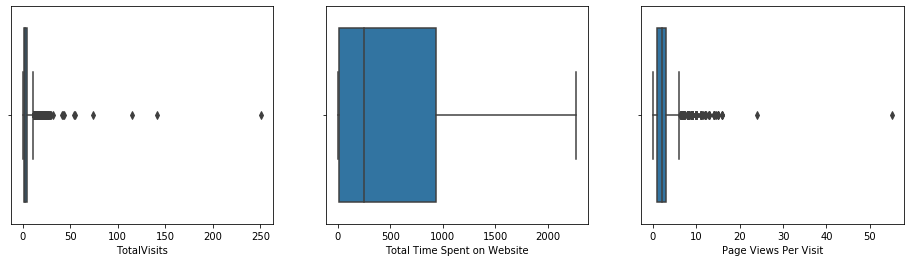

In [58]:
plt.figure(figsize=(16, 4))

plt.subplot(131)
sns.boxplot(num_lead['TotalVisits'])

plt.subplot(132)
sns.boxplot(num_lead['Total Time Spent on Website'])

plt.subplot(133)
sns.boxplot(num_lead['Page Views Per Visit'])

plt.show()

In [59]:
# Capping the outliers to 99th percentile for 2 variables showing outliers in above boxplots.
q4_TotalVisits = lead_data['TotalVisits'].quantile(0.99)
q4_PageViewsPerVisit = lead_data['Page Views Per Visit'].quantile(0.99)

lead_data['TotalVisits'][lead_data['TotalVisits'] >= q4_TotalVisits] = q4_TotalVisits
lead_data['Page Views Per Visit'][lead_data['Page Views Per Visit'] >= q4_PageViewsPerVisit] = q4_PageViewsPerVisit

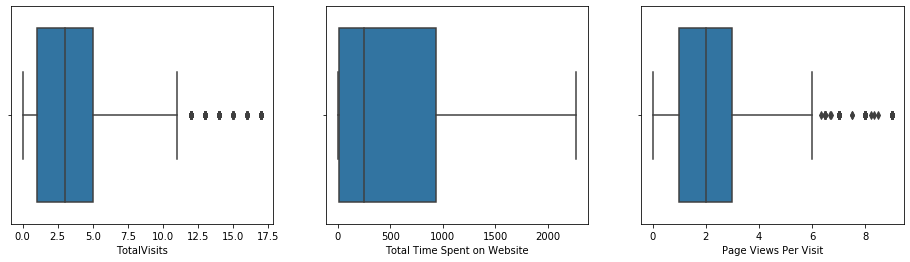

In [60]:
plt.figure(figsize=(16, 4))

plt.subplot(131)
sns.boxplot(lead_data['TotalVisits'])

plt.subplot(132)
sns.boxplot(lead_data['Total Time Spent on Website'])

plt.subplot(133)
sns.boxplot(lead_data['Page Views Per Visit'])

plt.show()

## Step 4: Test-Train Split

In [61]:
import sklearn
from sklearn.model_selection import train_test_split

In [62]:
lead_data.head()

,Prospect ID,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Last Activity_Others,Last Activity_SMS Sent,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_SMS Sent
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0.0,0,0,0,0,1,0,0,0,1,0,1,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,5,674,2.5,0,0,0,0,0,1,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,1,2,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,1,305,1.0,0,1,0,0,0,0,0,0,1,0,1,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,1,2,1428,1.0,0,1,0,1,0,0,0,0,1,0,1,0,0


In [63]:
# Putting feature variables to X (new dataframe).
X = lead_data.drop(['Prospect ID','Lead Number','Converted'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Last Activity_Others,Last Activity_SMS Sent,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_SMS Sent
0,0,0,0.0,0,0,0,0,1,0,0,0,1,0,1,0,0
1,5,674,2.5,0,0,0,0,0,1,0,0,0,0,0,0,0
2,2,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0
3,1,305,1.0,0,1,0,0,0,0,0,0,1,0,1,0,0
4,2,1428,1.0,0,1,0,1,0,0,0,0,1,0,1,0,0


In [64]:
# Putting responsible variable to y.
y = lead_data['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [65]:
# Splitting the data into train and test.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Step 5: Featured Scaling

In [66]:
from sklearn.preprocessing import StandardScaler

In [67]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Last Activity_Others,Last Activity_SMS Sent,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_SMS Sent
1871,-1.022595,-0.885371,-1.180474,0,0,0,0,1,0,0,0,0,0,0,0,0
6795,0.205373,0.005716,-0.503379,1,1,0,0,0,0,0,0,0,0,0,0,0
3516,0.512365,-0.691418,0.092260,0,0,0,0,1,0,0,0,0,0,0,0,0
8105,0.512365,1.365219,1.364995,0,1,0,1,0,0,0,0,0,1,0,0,1
3934,-1.022595,-0.885371,-1.180474,0,0,0,0,1,0,0,0,0,0,1,0,0


In [68]:
# Checking Lead Conversion Rate.
Lead_Conversion = 100*(sum(lead_data['Converted'])/len(lead_data['Converted'].index))
Lead_Conversion

38.53896103896104

#### We have almost 39% conversion rate

## Step 6: Looking at Correlations

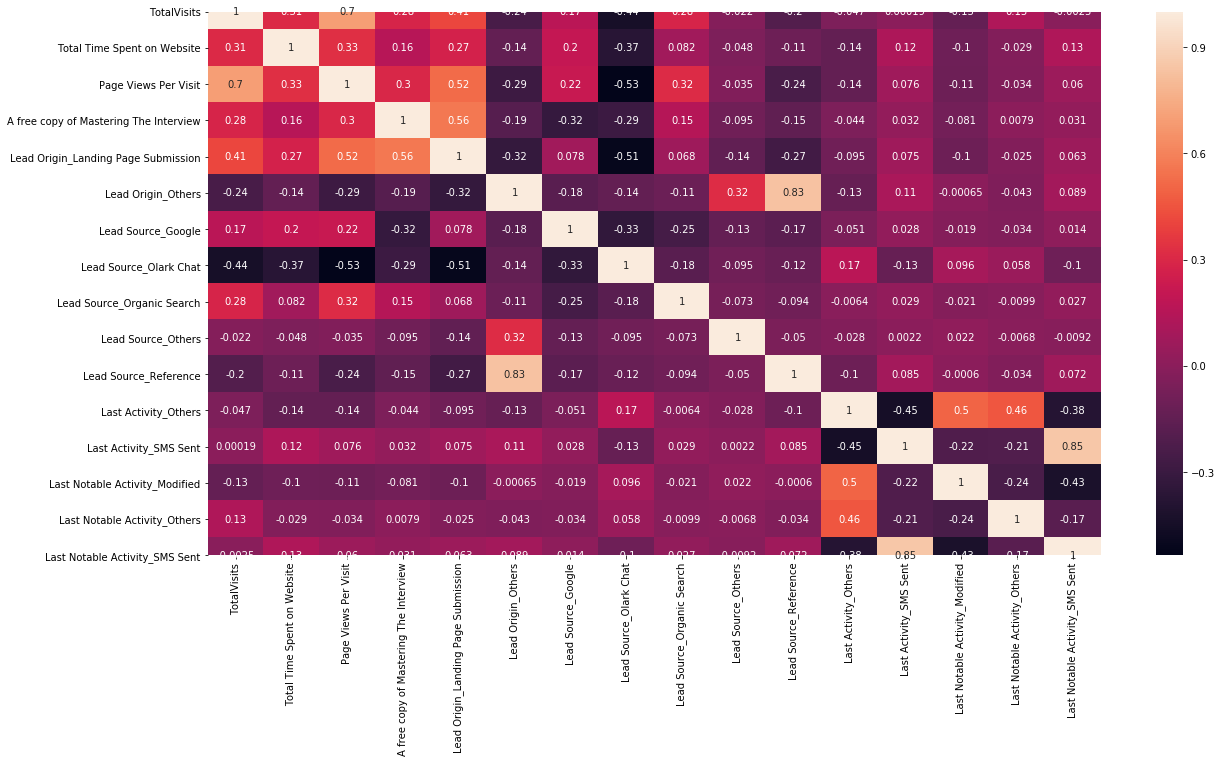

In [69]:
plt.figure(figsize=(20,10))
sns.heatmap(X_train.corr(), annot=True)
plt.show()

## Step 7: Model Building

### Running first training model

In [70]:
import statsmodels.api as sm

In [71]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2921.4
Date:                Mon, 07 Sep 2020   Deviance:                       5842.8
Time:                        08:10:01   Pearson chi2:                 6.80e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -1.2249      0.128     -9.545      0.000      -1.476      -0.973
TotalVisits                                0.2663      0.045      5.882      0.000       0.178       0.355
Total Time Spent on Website                1.1062      0.038     28.766      0.000       1.031       1.182
Page Views Per Visit                      -0.2194      0.052     -4.198      0.000      -0.322      -0.117
A free copy of Mastering The Interview    -0.0088      0.100     -0.088      0.930      -0.205       0.187
Lead Origin_Landing Page Submission       -0.0567      0.101     -0.563      0.573      -0.254       0.141
Lead Origin_Others                         2.6316      0.290      9.083      0.000       2.064       3.199
Lead Source_Google                         0.4059      0.107      3.790      0.000       0.196       0.616
Lead Source_Olark Chat                     1.1540      0.151      7.656      0.000       0.859       1.449
Lead Source_Organic Search                 0.1636      0.123      1.333      0.182      -0.077       0.404
Lead Source_Others                         0.2918      0.247      1.181      0.238      -0.192       0.776
Lead Source_Reference                      1.5916      0.348      4.572      0.000       0.909       2.274
Last Activity_Others                      -0.9478      0.150     -6.327      0.000      -1.241      -0.654
Last Activity_SMS Sent                     0.3097      0.171      1.808      0.071      -0.026       0.645
Last Notable Activity_Modified            -0.4044      0.132     -3.062      0.002      -0.663      -0.146
Last Notable Activity_Others               0.3835      0.195      1.971      0.049       0.002       0.765
Last Notable Activity_SMS Sent             1.0227      0.190      5.378      0.000       0.650       1.395
==========================================================================================================
"""

## Step 8: Feature Selection Using RFE

In [72]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [73]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 12)
rfe = rfe.fit(X_train, y_train)

In [74]:
rfe.support_

array([ True,  True, False, False, False,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True])

In [75]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 2),
 ('A free copy of Mastering The Interview', False, 5),
 ('Lead Origin_Landing Page Submission', False, 4),
 ('Lead Origin_Others', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 3),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Notable Activity_Modified', True, 1),
 ('Last Notable Activity_Others', True, 1),
 ('Last Notable Activity_SMS Sent', True, 1)]

In [76]:
col = X_train.columns[rfe.support_]

In [77]:
X_train.columns[~rfe.support_]

Index(['Page Views Per Visit', 'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Source_Organic Search'],
      dtype='object')

### Assessing the model with StatsModels

In [78]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2932.1
Date:                Mon, 07 Sep 2020   Deviance:                       5864.2
Time:                        08:10:02   Pearson chi2:                 6.77e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.2930      0.072    -17.951      0.000      -1.434      -1.152
TotalVisits                        0.1735      0.038      4.519      0.000       0.098       0.249
Total Time Spent on Website        1.1020      0.038     28.716      0.000       1.027       1.177
Lead Origin_Others                 2.8727      0.285     10.073      0.000       2.314       3.432
Lead Source_Google                 0.3835      0.076      5.016      0.000       0.234       0.533
Lead Source_Olark Chat             1.3661      0.115     11.928      0.000       1.142       1.591
Lead Source_Others                 0.2493      0.234      1.066      0.286      -0.209       0.708
Lead Source_Reference              1.5586      0.340      4.587      0.000       0.893       2.225
Last Activity_Others              -0.9079      0.150     -6.064      0.000      -1.201      -0.614
Last Activity_SMS Sent             0.3000      0.171      1.753      0.080      -0.035       0.635
Last Notable Activity_Modified    -0.4117      0.132     -3.116      0.002      -0.671      -0.153
Last Notable Activity_Others       0.4128      0.194      2.129      0.033       0.033       0.793
Last Notable Activity_SMS Sent     1.0135      0.190      5.336      0.000       0.641       1.386
==================================================================================================
"""

In [79]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.253492
6795    0.222509
3516    0.354356
8105    0.880522
3934    0.183663
4844    0.891777
3297    0.129898
8071    0.819499
987     0.139453
7423    0.928394
dtype: float64

In [80]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.25349174, 0.22250851, 0.35435558, 0.88052202, 0.18366251,
       0.8917768 , 0.12989839, 0.81949921, 0.13945325, 0.92839424])

### Creating a dataframe with the actual converted flag and the predicted probabilities

In [81]:
y_train_pred_final = pd.DataFrame({'Converted': y_train.values, 'Converted_Prob': y_train_pred})
y_train_pred_final['Lead_Num'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Lead_Num
0,0,0.253492,1871
1,0,0.222509,6795
2,0,0.354356,3516
3,0,0.880522,8105
4,0,0.183663,3934


In [82]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Lead_Num,Predicted
0,0,0.253492,1871,0
1,0,0.222509,6795,0
2,0,0.354356,3516,0
3,0,0.880522,8105,1
4,0,0.183663,3934,0


In [83]:
from sklearn import metrics

In [84]:
# Confusion Metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[3497  505]
 [ 789 1677]]


In [85]:
# Predicted     not_churn    churn
# Actual
# not_converted    3497      505
# converted        789       1677

In [86]:
# Checking overall accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7999381570810142


### Checking VIFs

In [87]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [88]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
8,Last Activity_SMS Sent,8.80
11,Last Notable Activity_SMS Sent,8.39
2,Lead Origin_Others,6.47
7,Last Activity_Others,5.83
9,Last Notable Activity_Modified,5.58
6,Lead Source_Reference,5.47
10,Last Notable Activity_Others,2.84
5,Lead Source_Others,1.83
4,Lead Source_Olark Chat,1.71
0,TotalVisits,1.42


In [89]:
# Let's start by dropping first variable with highest VIF
col = col.drop('Last Activity_SMS Sent', 1)
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Lead Origin_Others',
       'Lead Source_Google', 'Lead Source_Olark Chat', 'Lead Source_Others',
       'Lead Source_Reference', 'Last Activity_Others',
       'Last Notable Activity_Modified', 'Last Notable Activity_Others',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [90]:
# Let's re-run the model using selected variables only
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2933.6
Date:                Mon, 07 Sep 2020   Deviance:                       5867.3
Time:                        08:10:02   Pearson chi2:                 6.78e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.2902      0.072    -17.922      0.000      -1.431      -1.149
TotalVisits                        0.1733      0.038      4.515      0.000       0.098       0.249
Total Time Spent on Website        1.1010      0.038     28.703      0.000       1.026       1.176
Lead Origin_Others                 2.8799      0.285     10.092      0.000       2.321       3.439
Lead Source_Google                 0.3823      0.076      5.001      0.000       0.232       0.532
Lead Source_Olark Chat             1.3562      0.114     11.866      0.000       1.132       1.580
Lead Source_Others                 0.2382      0.233      1.020      0.308      -0.219       0.696
Lead Source_Reference              1.5450      0.340      4.546      0.000       0.879       2.211
Last Activity_Others              -1.0512      0.124     -8.454      0.000      -1.295      -0.808
Last Notable Activity_Modified    -0.2672      0.102     -2.620      0.009      -0.467      -0.067
Last Notable Activity_Others       0.5570      0.175      3.186      0.001       0.214       0.900
Last Notable Activity_SMS Sent     1.3129      0.083     15.759      0.000       1.150       1.476
==================================================================================================
"""

In [91]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.252361
6795    0.222991
3516    0.352868
8105    0.880469
3934    0.205338
4844    0.891807
3297    0.130276
8071    0.819176
987     0.138546
7423    0.928328
dtype: float64

In [92]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.25236066, 0.22299075, 0.3528678 , 0.88046892, 0.20533798,
       0.89180662, 0.13027649, 0.81917597, 0.13854609, 0.92832796])

In [93]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead_Num,Predicted
0,0,0.253492,1871,0
1,0,0.222509,6795,0
2,0,0.354356,3516,0
3,0,0.880522,8105,1
4,0,0.183663,3934,0


In [94]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7999381570810142


### Overall accuracy hasn't dropped

In [95]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,Lead Origin_Others,6.47
6,Lead Source_Reference,5.46
7,Last Activity_Others,3.87
8,Last Notable Activity_Modified,3.24
9,Last Notable Activity_Others,2.27
5,Lead Source_Others,1.83
4,Lead Source_Olark Chat,1.70
0,TotalVisits,1.42
3,Lead Source_Google,1.40
10,Last Notable Activity_SMS Sent,1.29


In [96]:
col = col.drop('Lead Origin_Others')
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Others', 'Lead Source_Reference',
       'Last Activity_Others', 'Last Notable Activity_Modified',
       'Last Notable Activity_Others', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [97]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6457
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2994.9
Date:                Mon, 07 Sep 2020   Deviance:                       5989.8
Time:                        08:10:02   Pearson chi2:                 6.76e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.2507      0.071    -17.637      0.000      -1.390      -1.112
TotalVisits                        0.0900      0.037      2.410      0.016       0.017       0.163
Total Time Spent on Website        1.0543      0.038     28.079      0.000       0.981       1.128
Lead Source_Google                 0.4159      0.076      5.492      0.000       0.267       0.564
Lead Source_Olark Chat             1.2019      0.111     10.784      0.000       0.983       1.420
Lead Source_Others                 1.7548      0.157     11.179      0.000       1.447       2.062
Lead Source_Reference              4.2525      0.207     20.575      0.000       3.847       4.658
Last Activity_Others              -1.1672      0.122     -9.577      0.000      -1.406      -0.928
Last Notable Activity_Modified    -0.2028      0.100     -2.035      0.042      -0.398      -0.008
Last Notable Activity_Others       0.6956      0.172      4.042      0.000       0.358       1.033
Last Notable Activity_SMS Sent     1.3513      0.082     16.418      0.000       1.190       1.513
==================================================================================================
"""

In [98]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.254610
6795    0.226854
3516    0.324850
8105    0.880998
3934    0.218063
4844    0.889248
3297    0.128001
8071    0.793642
987     0.427617
7423    0.930152
dtype: float64

In [99]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.25460974, 0.226854  , 0.32485023, 0.88099814, 0.21806269,
       0.88924843, 0.12800142, 0.79364237, 0.42761653, 0.93015194])

In [100]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead_Num,Predicted
0,0,0.253492,1871,0
1,0,0.222509,6795,0
2,0,0.354356,3516,0
3,0,0.880522,8105,1
4,0,0.183663,3934,0


In [101]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7999381570810142


### Overall accuracy is still the same.

In [102]:
# Checking VIFs again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
6,Last Activity_Others,3.84
7,Last Notable Activity_Modified,3.22
8,Last Notable Activity_Others,2.25
3,Lead Source_Olark Chat,1.69
2,Lead Source_Google,1.39
0,TotalVisits,1.38
9,Last Notable Activity_SMS Sent,1.28
1,Total Time Spent on Website,1.24
5,Lead Source_Reference,1.21
4,Lead Source_Others,1.06


### All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only.

In [103]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[3497  505]
 [ 789 1677]]


In [104]:
# Predicted     not_churn    churn
# Actual
# not_converted    3497      505
# converted        789       1677

In [105]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7999381570810142


### Metrics beyond simple accuracy

In [106]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [107]:
# Calculation Sensitivity
TP/float(TP+FN)

0.6800486618004866

In [108]:
# Calculating Specificity
TN/float(TN+FP)

0.8738130934532734

In [109]:
# Calculating false positive rate - predicting converted when customer did not convert
FP/float(TN+FP)

0.12618690654672662

In [110]:
# Positive predictive value
TP/float(TP+FP)

0.7685609532538955

In [111]:
# Negative Predictive Value
TN/float(TN+FN)

0.8159122725151656

## Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [112]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [113]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

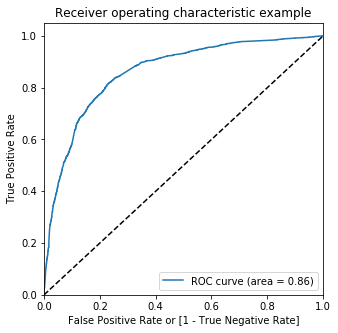

In [114]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

## Step 10: Finding Optimum Cutoff point

Optimal cutoff point is that point where we will have balanced sensitivity & specificity

In [115]:
# Creating columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead_Num,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.253492,1871,0,1,1,1,0,0,0,0,0,0,0
1,0,0.222509,6795,0,1,1,1,0,0,0,0,0,0,0
2,0,0.354356,3516,0,1,1,1,1,0,0,0,0,0,0
3,0,0.880522,8105,1,1,1,1,1,1,1,1,1,1,0
4,0,0.183663,3934,0,1,1,0,0,0,0,0,0,0,0


In [116]:
# Calculation accuracy, sensitivity & specificity for various cuttoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1  
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.572665  0.973642  0.325587
0.2   0.2  0.723253  0.905515  0.610945
0.3   0.3  0.783859  0.824818  0.758621
0.4   0.4  0.794991  0.757097  0.818341
0.5   0.5  0.799938  0.680049  0.873813
0.6   0.6  0.773500  0.547851  0.912544
0.7   0.7  0.756494  0.453771  0.943028
0.8   0.8  0.731138  0.349959  0.966017
0.9   0.9  0.668831  0.151663  0.987506


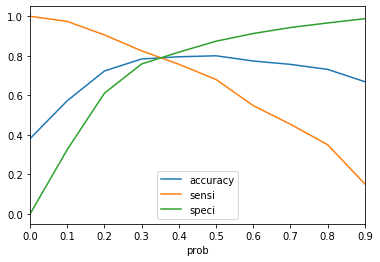

In [117]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### From the above plot, 0.33 is the optimum cutoff point

In [118]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.33 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead_Num,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.253492,1871,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.222509,6795,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.354356,3516,0,1,1,1,1,0,0,0,0,0,0,1
3,0,0.880522,8105,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.183663,3934,0,1,1,0,0,0,0,0,0,0,0,0


In [119]:
y_train_pred_final['Score'] = round(y_train_pred_final['Converted_Prob']*100, 2)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead_Num,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Score
0,0,0.253492,1871,0,1,1,1,0,0,0,0,0,0,0,0,25.35
1,0,0.222509,6795,0,1,1,1,0,0,0,0,0,0,0,0,22.25
2,0,0.354356,3516,0,1,1,1,1,0,0,0,0,0,0,1,35.44
3,0,0.880522,8105,1,1,1,1,1,1,1,1,1,1,0,1,88.05
4,0,0.183663,3934,0,1,1,0,0,0,0,0,0,0,0,0,18.37


In [120]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7888064316635746

In [121]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
confusion2

array([[3118,  884],
       [ 482, 1984]])

In [122]:
TP = confusion2[1,1] 
TN = confusion2[0,0]
FP = confusion2[0,1]
FN = confusion2[1,0]

## Final Sensitivity & Specificity

In [123]:
# Calculating Sensitivity
TP/float(TP+FN)

0.8045417680454177

In [124]:
# Calculating Specificity
TN/float(TN+FN)

0.8661111111111112

In [125]:
# Calculating false positive rate - predicting converted when customer did not convert
FP/float(TN+FP)

0.22088955522238882

In [126]:
# Positive predictive value
TP/float(TP+FP)

0.691771269177127

In [127]:
# Negative Predictive Value
TN/float(TN+FN)

0.8661111111111112

## Precision & Recall

In [128]:
# Looking at confusion metrics again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
confusion

array([[3497,  505],
       [ 789, 1677]])

##### Precision
TP/(TP+FP)

##### Recall
TP/(TP+FN)

In [129]:
from sklearn.metrics import precision_score, recall_score

In [130]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7685609532538955

In [131]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.6800486618004866

### Precision & Recall Tradeoff

In [132]:
from sklearn.metrics import precision_recall_curve

In [133]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64, 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6463    1
 6464    1
 6465    0
 6466    0
 6467    0
 Name: Predicted, Length: 6468, dtype: int64)

In [134]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

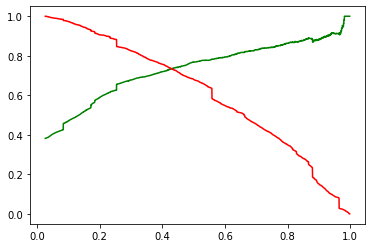

In [135]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Step 11: Making predictions on the test data

In [136]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [137]:
X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Others,Lead Source_Reference,Last Activity_Others,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_SMS Sent
4269,1.433341,0.964504,0,0,0,0,0,0,0,1
2376,-1.022595,-0.885371,0,0,0,1,0,0,0,1
7766,0.512365,-0.777416,1,0,0,0,1,0,1,0
9199,-1.022595,-0.885371,0,1,0,0,1,1,0,0
4359,-1.022595,-0.885371,0,0,0,1,0,0,0,0


In [138]:
X_test_sm = sm.add_constant(X_test)

In [139]:
y_test_pred = res.predict(X_test_sm)

In [140]:
y_test_pred[:10]

4269    0.776684
2376    0.965367
7766    0.111070
9199    0.079861
4359    0.878298
9186    0.697920
1631    0.557746
8963    0.220914
8007    0.077002
5324    0.470689
dtype: float64

In [141]:
# Converting y_test_pred to a dataframe.
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
4269,0.776684
2376,0.965367
7766,0.111070
9199,0.079861
4359,0.878298


In [142]:
# Converting y_test to a dataframe.
y_test_df = pd.DataFrame(y_test)

In [143]:
# Putting Lead_Num to index.
y_test_df['Lead_Num'] = y_test_df.index

In [144]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [145]:
# Appending y_test_df & y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)

In [146]:
y_pred_final.head()

,Converted,Lead_Num,0
0,1,4269,0.776684
1,1,2376,0.965367
2,1,7766,0.111070
3,0,9199,0.079861
4,1,4359,0.878298


In [147]:
# Renaming the column
y_pred_final = y_pred_final.rename(columns={0 : 'Converted_Prob'})

In [148]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Lead_Num','Converted','Converted_Prob'], axis=1)

In [149]:
y_pred_final.head()

,Lead_Num,Converted,Converted_Prob
0,4269,1,0.776684
1,2376,1,0.965367
2,7766,1,0.111070
3,9199,0,0.079861
4,4359,1,0.878298


In [150]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.33 else 0)

In [151]:
y_pred_final.head()

,Lead_Num,Converted,Converted_Prob,final_predicted
0,4269,1,0.776684,1
1,2376,1,0.965367,1
2,7766,1,0.111070,0
3,9199,0,0.079861,0
4,4359,1,0.878298,1


In [152]:
y_pred_final['Score'] = round(y_pred_final['Converted_Prob']*100, 2)
y_pred_final.head()

,Lead_Num,Converted,Converted_Prob,final_predicted,Score
0,4269,1,0.776684,1,77.67
1,2376,1,0.965367,1,96.54
2,7766,1,0.111070,0,11.11
3,9199,0,0.079861,0,7.99
4,4359,1,0.878298,1,87.83


In [153]:
# Overall accuracy
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7831890331890332

In [154]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1299,  378],
       [ 223,  872]])

In [155]:
TP = confusion2[1,1] 
TN = confusion2[0,0]
FP = confusion2[0,1]
FN = confusion2[1,0]

In [156]:
# Sensitivity of Test Data
TP/float(TP+FN)

0.7963470319634703

In [157]:
# Specificity of Test Data
TN/float(TN+FP)

0.774597495527728

### We have introduced one more variable ‘Score’ both in training and testing dataset basis on which we can target our customers.
### Value of variable ‘Score’ lies between 0 to 100 and as the value increase there is high probability of conversion and accordingly we can decide which customer to target.
### Our model is good as it has high sensitivity of around 80%.
### Comparision of Accuracy, Sensitivity & Specificity:
- Accuracy of Training and Testing Data – 78.88% & 78.32%.
- Sensitivity of Training and Testing Data – 80.45% & 79.63%.
- Specificity of Training & Testing Data – 86.61% & 77.46%.